### Creating Train & Test 

In [1]:
#Libraries that will be used by both fastText & XGBoost
import pandas as pd
import time
import sys
sys.path.append("..")
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/train/reuters_train_52/r52-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/test/reuters_test_52/r52-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']
test.head()

,label,content
0,trade,asian exporters fear damage from u s japan rif...
1,grain,china daily says vermin eat pct grain stocks a...
2,ship,australian foreign ship ban ends but nsw ports...
3,gold,western mining to open new gold mine in austra...
4,acq,sumitomo bank aims at quick recovery from merg...


### fastText

In [3]:
#Importing Libs that are useul to fastText

import os
from FasttextClassifier.FasttextClassifier import FasttextClassifier
from sklearn.model_selection import train_test_split
import random
import csv
from pathlib import Path

#Creating column with the label in fastText format

test['label'] = '__label__'+test['label']
train['label'] = '__label__'+train['label']


#saving train file
train.to_csv('trainFT.txt', sep='\t', header=None, index=False)
test.to_csv('testFT.txt', sep='\t', header=None, index=False)


#Start time measurement
start_time = time.time()

#Create model and Test

ft_model = FasttextClassifier(train_data='trainFT.txt')
fastText_test=ft_model.fasttext_test('testFT.txt')
fastText_accuracy= fastText_test[1]
print (fastText_accuracy)
fastText_execution_time= (time.time() - start_time)
print("--- %s seconds ---" % fastText_execution_time)

0.9283489096573209
--- 3.492659330368042 seconds ---


In [4]:
execTime_FT = []
accFT_lst = []
for epoch in range(1, 100):
    start_time = time.time()
    ft_model = FasttextClassifier(train_data='trainFT.txt', epoch=epoch)
    fastText_test = ft_model.fasttext_test('testFT.txt')
    fastText_accuracy = fastText_test[1]
    accFT_lst.append(fastText_accuracy)
    print (fastText_accuracy)
    fastText_execution_time= (time.time() - start_time)
    execTime_FT.append(fastText_execution_time)
    print("--- %s seconds ---" % fastText_execution_time)

0.7558411214953271
--- 0.33011674880981445 seconds ---
0.8403426791277259
--- 0.4448103904724121 seconds ---
0.8660436137071651
--- 0.4837064743041992 seconds ---
0.8827881619937694
--- 0.5096368789672852 seconds ---
0.889018691588785
--- 0.6313674449920654 seconds ---
0.8956386292834891
--- 0.7370142936706543 seconds ---
0.9049844236760125
--- 0.688159704208374 seconds ---
0.9108255451713395
--- 0.798863410949707 seconds ---
0.911993769470405
--- 0.9424796104431152 seconds ---
0.9174454828660437
--- 1.028249979019165 seconds ---
0.9225077881619937
--- 1.0053117275238037 seconds ---
0.9232866043613707
--- 1.1030499935150146 seconds ---
0.9256230529595015
--- 1.2267193794250488 seconds ---
0.92601246105919
--- 1.3334336280822754 seconds ---
0.9283489096573209
--- 1.4331669807434082 seconds ---
0.9291277258566978
--- 1.4022495746612549 seconds ---
0.927570093457944
--- 1.527914047241211 seconds ---
0.9314641744548287
--- 1.7343616485595703 seconds ---
0.9291277258566978
--- 2.08991789817

#### XGBoost

In [5]:
#Importing Libs that are useul to XGBoost

import xgboost as xgb
from glove.glovevectorizer import GloveVectorizer
from sklearn.metrics import mean_squared_error, accuracy_score

In [6]:
#Load word vectors

vectorizer = GloveVectorizer()
Xtrain = vectorizer.fit_transform(train.content) # get wordvectors


Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 6532


In [7]:
#Start time measurement

start_time = time.time()

xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3, learning_rate=1,max_depth=5, alpha=10, n_estimators=10)
trainLabelLst = list(dict.fromkeys(train.label))
def get_label(label_str_lst, label_lst):
    return_lst = []
    for s1 in label_str_lst:
        for i, label in enumerate(label_lst):
            if s1 == label:
                return_lst.append(i)
    return return_lst


# get label index

train['label_idx'] = get_label(train['label'],trainLabelLst)
Ytrain = train.label_idx

data_dmmatrix= xgb.DMatrix(data=Xtrain,label=Ytrain)
param = {
    'max_depth': 10,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 52} 
epochs = 1

model = xgb.train(param, data_dmmatrix, epochs)
Xtest = vectorizer.transform(test.content)
test['label_idx'] = get_label(test['label'],trainLabelLst)
Ytest = test.label_idx
xgb_test = xgb.DMatrix(Xtest, label=Ytest)
predictions = model.predict(xgb_test)
XGBoost_accuracy=accuracy_score(Ytest, predictions)
print(XGBoost_accuracy)
XGBoost_time= model.predict(xgb_test)
XGBoost_execution_time= (time.time() - start_time)
print("--- %s seconds ---" % XGBoost_execution_time)

Numer of samples with no words found: 0 / 2568
0.758177570093458
--- 0.7430112361907959 seconds ---


In [8]:
execTime_XG = []
accXG_lst = []
for epochs in range(1, 100):
    start_time = time.time()
    model = xgb.train(param, data_dmmatrix, epochs)
    Xtest = vectorizer.transform(test.content)
    test['label_idx'] = get_label(test['label'],trainLabelLst)
    Ytest = test.label_idx
    xgb_test = xgb.DMatrix(Xtest, label=Ytest)
    predictions = model.predict(xgb_test)
    XGBoost_accuracy = accuracy_score(Ytest, predictions)
    accXG_lst.append(XGBoost_accuracy)
    print(XGBoost_accuracy)
    XGBoost_time= model.predict(xgb_test)
    XGBoost_execution_time= (time.time() - start_time)
    execTime_XG.append(XGBoost_execution_time)
    print("--- %s seconds ---" % XGBoost_execution_time)

Numer of samples with no words found: 0 / 2568
0.758177570093458
--- 0.755976676940918 seconds ---
Numer of samples with no words found: 0 / 2568
0.7655763239875389
--- 1.238687515258789 seconds ---
Numer of samples with no words found: 0 / 2568
0.7725856697819314
--- 1.670532464981079 seconds ---
Numer of samples with no words found: 0 / 2568
0.7834890965732088
--- 2.0624840259552 seconds ---
Numer of samples with no words found: 0 / 2568
0.7873831775700935
--- 2.429502487182617 seconds ---
Numer of samples with no words found: 0 / 2568
0.7932242990654206
--- 2.9072251319885254 seconds ---
Numer of samples with no words found: 0 / 2568
0.7955607476635514
--- 3.4769020080566406 seconds ---
Numer of samples with no words found: 0 / 2568
0.7986760124610592
--- 3.8642892837524414 seconds ---
Numer of samples with no words found: 0 / 2568
0.80101246105919
--- 4.101032018661499 seconds ---
Numer of samples with no words found: 0 / 2568
0.8029595015576324
--- 4.441123008728027 seconds ---
Nu

Numer of samples with no words found: 0 / 2568
0.8345015576323987
--- 17.430615663528442 seconds ---
Numer of samples with no words found: 0 / 2568
0.8345015576323987
--- 18.05571222305298 seconds ---
Numer of samples with no words found: 0 / 2568
0.8348909657320872
--- 17.24719524383545 seconds ---
Numer of samples with no words found: 0 / 2568
0.8345015576323987
--- 17.49221897125244 seconds ---
Numer of samples with no words found: 0 / 2568
0.8345015576323987
--- 17.703653812408447 seconds ---
Numer of samples with no words found: 0 / 2568
0.8341121495327103
--- 17.84677767753601 seconds ---
Numer of samples with no words found: 0 / 2568
0.8348909657320872
--- 18.298508405685425 seconds ---
Numer of samples with no words found: 0 / 2568
0.8345015576323987
--- 18.128517627716064 seconds ---
Numer of samples with no words found: 0 / 2568
0.8341121495327103
--- 18.40433359146118 seconds ---
Numer of samples with no words found: 0 / 2568
0.8341121495327103
--- 18.144474029541016 seconds

### Plots

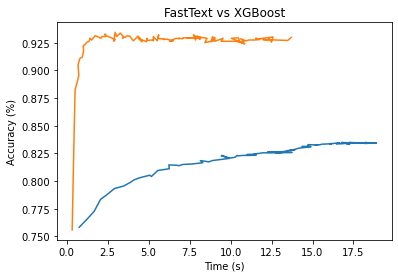

In [27]:
xg=plt.plot(execTime_XG, accXG_lst, label='XGBoost')
ftext=plt.plot(execTime_FT, accFT_lst)
plt.ylabel("Accuracy (%)")
plt.xlabel("Time (s)")
plt.title("FastText vs XGBoost")

plt.show()